Author: Zaur Gouliev

Email: zaurgouliev@gmail.com

Some interesting aspects of this dataset to analyse are:

- Contribution patterns over time: You could analyze the number of personnel contributions over time to see if there are any trends or patterns. For example, you could look at which countries or regions contribute the most personnel and whether this changes over time.

- Gender representation in different personnel types: You could explore the gender breakdown of different personnel types (e.g., military, police, civilian) to see if there are any patterns or disparities in gender representation.

- Relationship between troop contributions and conflict: You could investigate whether there is any relationship between the number of troops contributed by a country and the level of conflict in that country. For example, you could look at whether countries with higher levels of conflict tend to contribute more personnel.

- Comparison of contributions across missions: You could compare the number and types of personnel contributed by different countries across different UN peacekeeping missions to see if there are any differences or similarities.

- Contribution diversity: You could explore the diversity of personnel contributions by looking at the number of countries that contribute personnel and the range of personnel types contributed. This could help you understand how diverse and representative UN peacekeeping missions are.



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/united-nations-peacekeeping-troops-and-police/odp_contributionranks.csv
/kaggle/input/united-nations-peacekeeping-troops-and-police/odp_contributionsbygender.csv


In [2]:
# Importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing one of our datasets
df = pd.read_csv('/kaggle/input/united-nations-peacekeeping-troops-and-police/odp_contributionranks.csv')
#odp_contributionsbygender = pd.read_csv('/kaggle/input/united-nations-peacekeeping-troops-and-police/odp_contributionsbygender.csv')

In [4]:
#odp_contributionsbygender.head()

In [5]:
df.head()

,ISOCode3,M49_Code,Contributing_Country,Personnel_Contribution_Rank,Female_Personnel,Male_Personnel,Total_Uniformed_Personnel,Last_Reporting_Date
0,BGD,50,Bangladesh,1,397,6006,6403,31-Jan-22
1,NPL,524,Nepal,2,324,5333,5657,31-Jan-22
2,IND,356,India,3,101,5497,5598,31-Jan-22
3,RWA,646,Rwanda,4,496,4784,5280,31-Jan-22
4,ETH,231,Ethiopia,5,563,4194,4757,31-Jan-22


In [6]:
# Printing column names of odp_contributionsbygender
print(df.columns)

Index(['ISOCode3', 'M49_Code', 'Contributing_Country',
       'Personnel_Contribution_Rank', 'Female_Personnel', 'Male_Personnel',
       'Total_Uniformed_Personnel', 'Last_Reporting_Date'],
      dtype='object')


In [7]:
# Printing summary statistics
print(df.describe())

         M49_Code  Personnel_Contribution_Rank  Female_Personnel  \
count  122.000000                   122.000000        122.000000   
mean   419.459016                    61.049180         47.795082   
std    251.579741                    34.780267         91.379233   
min      8.000000                     1.000000          0.000000   
25%    205.000000                    31.250000          2.250000   
50%    413.500000                    61.500000         12.500000   
75%    624.500000                    91.000000         52.250000   
max    894.000000                   122.000000        563.000000   

       Male_Personnel  Total_Uniformed_Personnel  
count      122.000000                 122.000000  
mean       569.024590                 616.819672  
std       1140.370496                1215.379157  
min          0.000000                   0.000000  
25%          8.250000                  11.000000  
50%         86.500000                 100.500000  
75%        593.500000         

In [8]:
# Checking for null values
print(df.isnull().sum())

ISOCode3                       0
M49_Code                       0
Contributing_Country           0
Personnel_Contribution_Rank    0
Female_Personnel               0
Male_Personnel                 0
Total_Uniformed_Personnel      0
Last_Reporting_Date            0
dtype: int64


In [9]:
# Printing dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ISOCode3                     122 non-null    object
 1   M49_Code                     122 non-null    int64 
 2   Contributing_Country         122 non-null    object
 3   Personnel_Contribution_Rank  122 non-null    int64 
 4   Female_Personnel             122 non-null    int64 
 5   Male_Personnel               122 non-null    int64 
 6   Total_Uniformed_Personnel    122 non-null    int64 
 7   Last_Reporting_Date          122 non-null    object
dtypes: int64(5), object(3)
memory usage: 7.8+ KB
None


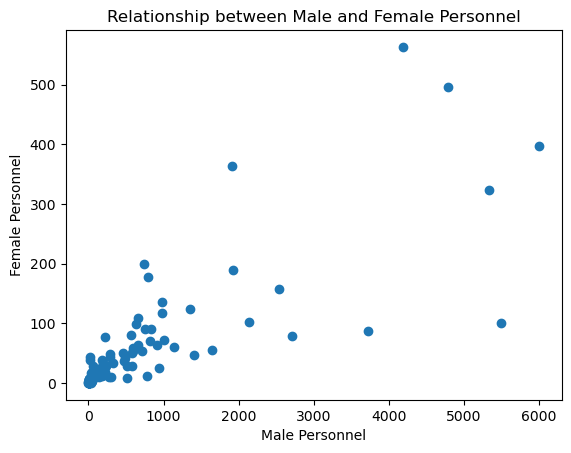

In [10]:
# Scatter plot of Male_Personnel vs. Female_Personnel
plt.scatter(df['Male_Personnel'], df['Female_Personnel'])
plt.xlabel('Male Personnel')
plt.ylabel('Female Personnel')
plt.title('Relationship between Male and Female Personnel')
plt.show()

In [11]:
# Group by country and sum the personnel
df_country = df.groupby('Contributing_Country')[['Female_Personnel', 'Male_Personnel']].sum()

In [12]:
# Compute the total personnel and sort by descending order
df_country['Total_Personnel'] = df_country['Female_Personnel'] + df_country['Male_Personnel']
df_country = df_country.sort_values(by='Total_Personnel', ascending=False).head(10)

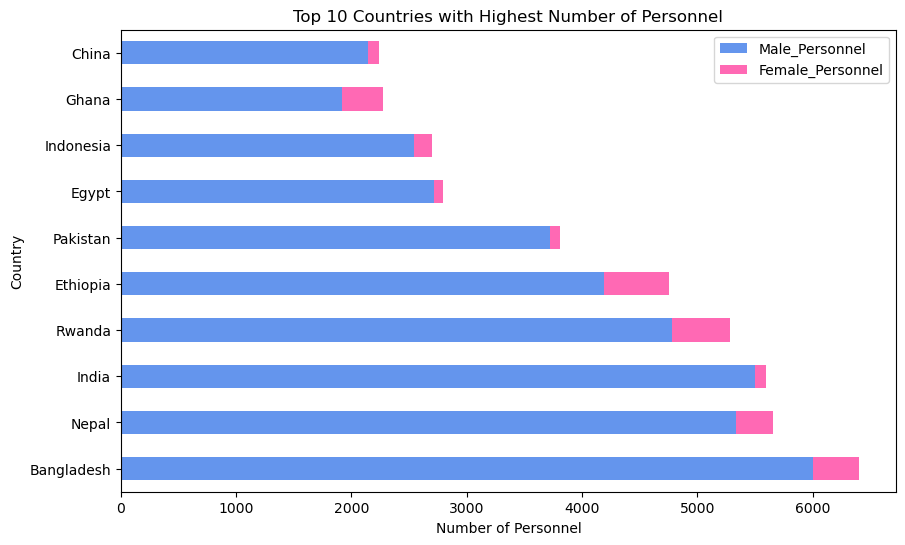

In [13]:
# Create a horizontal bar plot
ax = df_country[['Male_Personnel', 'Female_Personnel']].plot(kind='barh', stacked=True, figsize=(10, 6), color=['#6495ED', '#FF69B4'])
ax.set_xlabel('Number of Personnel')
ax.set_ylabel('Country')
ax.set_title('Top 10 Countries with Highest Number of Personnel')

plt.show()

In [14]:
# Filter the dataset for Ireland
df_ireland = df[df['ISOCode3'] == 'IRL']

# Sum the personnel columns
total_personnel = df_ireland['Female_Personnel'].sum() + df_ireland['Male_Personnel'].sum()

print("The total number of Irish personnel is:", total_personnel)

The total number of Irish personnel is: 512


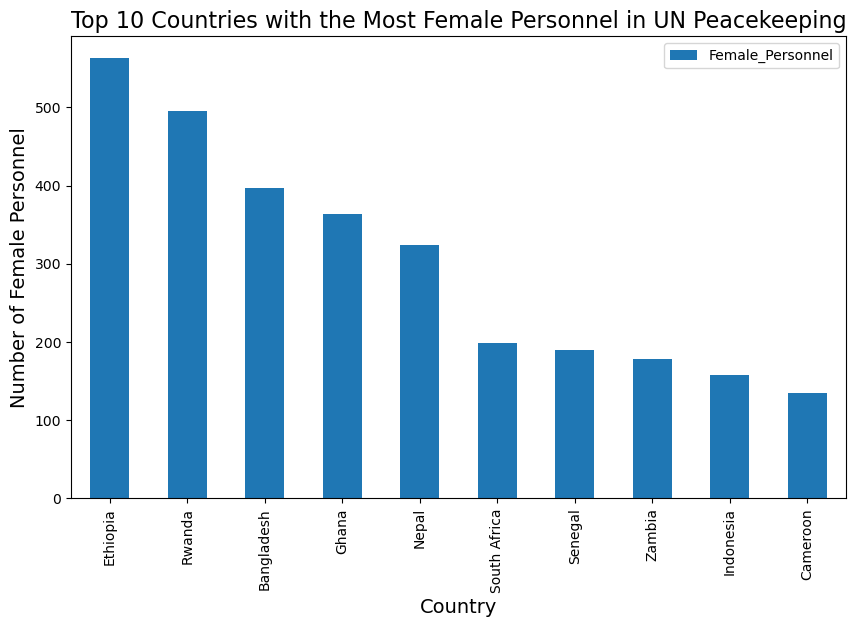

In [15]:
# Group by country and sum the female personnel
df_female = df.groupby('Contributing_Country')['Female_Personnel'].sum().reset_index()

# Sort by female personnel count and get top 10 countries
df_female = df_female.sort_values(by='Female_Personnel', ascending=False).head(10)

# Create a bar plot
ax = df_female.plot(x='Contributing_Country', y='Female_Personnel', kind='bar', figsize=(10, 6))

# Set the plot title and labels
ax.set_title('Top 10 Countries with the Most Female Personnel in UN Peacekeeping', fontsize=16)
ax.set_xlabel('Country', fontsize=14)
ax.set_ylabel('Number of Female Personnel', fontsize=14)

# Show the plot
plt.show()

In [16]:
# Group the dataframe by country and sum the female personnel
df_female_count = df.groupby('Contributing_Country')['Female_Personnel'].sum()

# Sort the dataframe by female personnel in ascending order
df_female_count = df_female_count.sort_values(ascending=True)

# Get the countries with the no female personnel
no_females_personnel = df_female_count.head(15)

# Display the result
print(no_females_personnel)

Contributing_Country
North Macedonia               0
Slovenia                      0
Bulgaria                      0
Brunei Darussalam             0
Botswana                      0
Qatar                         0
Iran (Islamic Republic of)    0
Cyprus                        0
Latvia                        0
Tajikistan                    0
Madagascar                    0
Azerbaijan                    0
Papua New Guinea              0
Algeria                       0
Luxembourg                    0
Name: Female_Personnel, dtype: int64


In [17]:
file_path = "/kaggle/input/united-nations-peacekeeping-troops-and-police/odp_contributionsbygender.csv"
df_gender = pd.read_csv(file_path)

In [18]:
print(df_gender.columns)

Index(['Contribution_ID', 'ISOCode3', 'M49_Code', 'Contributing_Country',
       'Mission_Acronym', 'Personnel_Type', 'Female_Personnel',
       'Male_Personnel', 'Last_Reporting_Date'],
      dtype='object')


In [19]:
print(df_gender['Personnel_Type'].unique())

['Experts on Mission' 'Staff Officer' 'Individual Police' 'Troops'
 'Formed Police Units']


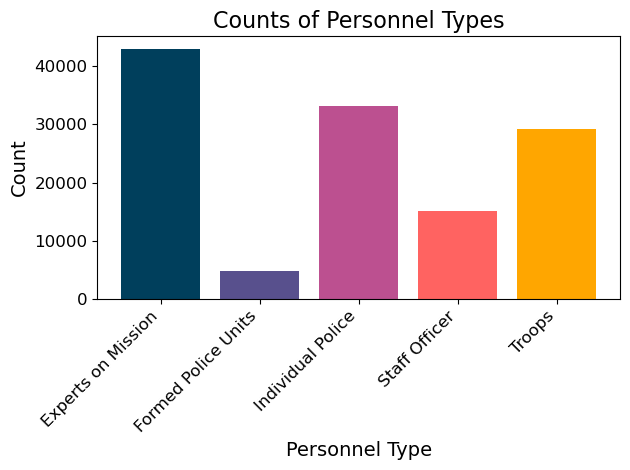

In [20]:
# Group the DataFrame by Personnel_Type and count the number of rows in each group
personnel_counts = df_gender.groupby('Personnel_Type').size().reset_index(name='counts')

# Define colors for the bars
colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']

# Create a bar chart of the counts with adjusted font size and colors
plt.bar(personnel_counts['Personnel_Type'], personnel_counts['counts'], color=colors)
plt.xlabel('Personnel Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Counts of Personnel Types', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [21]:
# Filter the DataFrame to only include rows with Personnel_Type 'Experts on Mission'
df_eom = df_gender[df_gender['Personnel_Type'] == 'Experts on Mission']

# Calculate the number of female and male Experts on Mission
num_female_eom = df_eom['Female_Personnel'].sum()
num_male_eom = df_eom['Male_Personnel'].sum()

# Print the counts of female and male Experts on Mission
print('Female Experts on Mission:', num_female_eom)
print('Male Experts on Mission:', num_male_eom)

Female Experts on Mission: 18076.0
Male Experts on Mission: 212870.0


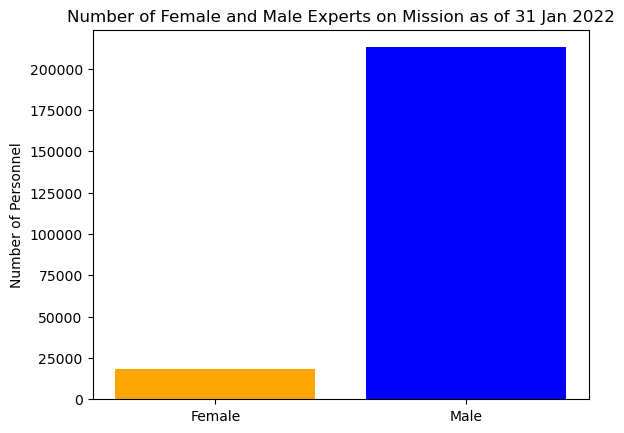

In [22]:
# Create a bar plot
fig, ax = plt.subplots()
ax.bar(['Female', 'Male'], [num_female_eom, num_male_eom], color=['orange', 'blue'])

# Set the title and axis labels
ax.set_title('Number of Female and Male Experts on Mission as of 31 Jan 2022')
ax.set_ylabel('Number of Personnel')

# Display the plot
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


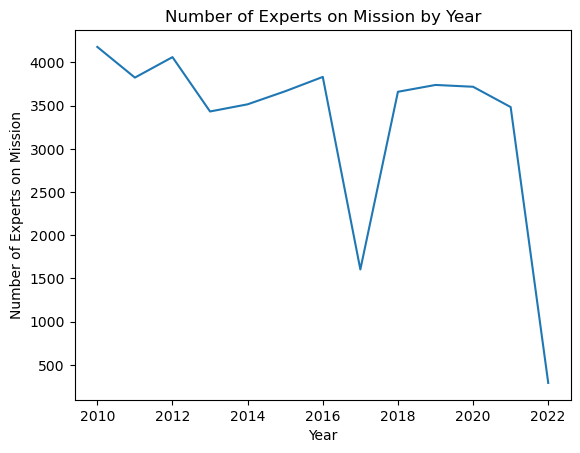

In [23]:
# Filter the dataset to only include Experts on Mission
df_eom = df_gender[df_gender['Personnel_Type'] == 'Experts on Mission']

# Convert the Last_Reporting_Date column to datetime format
df_eom['Last_Reporting_Date'] = pd.to_datetime(df_eom['Last_Reporting_Date'])

# Group the filtered DataFrame by year and count the number of rows in each group
eom_counts = df_eom.groupby(df_eom['Last_Reporting_Date'].dt.year).size().reset_index(name='counts')

# Create a line plot of the number of Experts on Mission over time
plt.plot(eom_counts['Last_Reporting_Date'], eom_counts['counts'])
plt.xlabel('Year')
plt.ylabel('Number of Experts on Mission')
plt.title('Number of Experts on Mission by Year')
plt.show()

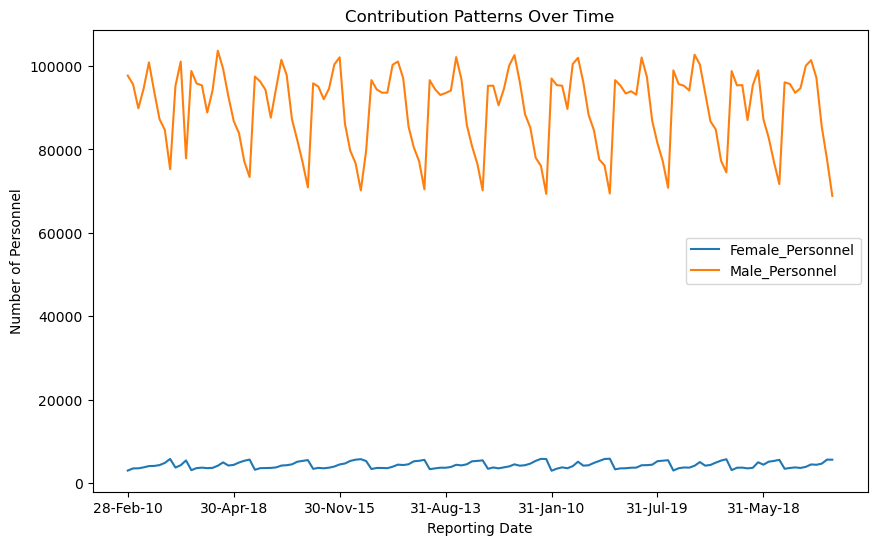

In [24]:
# Group the df_gender DataFrame by Last_Reporting_Date and sum the number of female and male personnel for each date
df_gender_counts = df_gender.groupby('Last_Reporting_Date')[['Female_Personnel', 'Male_Personnel']].sum()

# Plot the number of female and male personnel over time
df_gender_counts.plot(kind='line', figsize=(10, 6))
plt.title('Contribution Patterns Over Time')
plt.xlabel('Reporting Date')
plt.ylabel('Number of Personnel')
plt.show()

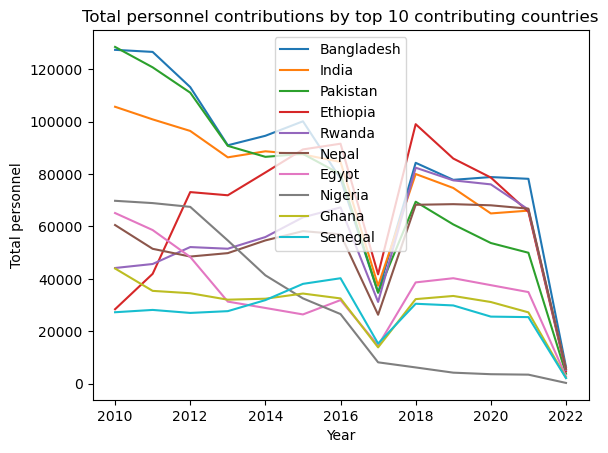

In [25]:
# Convert the reporting date column to datetime format
df_gender['Last_Reporting_Date'] = pd.to_datetime(df_gender['Last_Reporting_Date'])

# Create a new column with the year of each reporting date
df_gender['Year'] = df_gender['Last_Reporting_Date'].dt.year

# Group the data by country and year, and sum the number of female and male personnel
df_by_country_year = df_gender.groupby(['Contributing_Country', 'Year']).sum()[['Female_Personnel', 'Male_Personnel']]

# Calculate the total number of personnel for each country and year
df_by_country_year['Total_Personnel'] = df_by_country_year['Female_Personnel'] + df_by_country_year['Male_Personnel']

# Get the top 10 contributing countries overall
top_countries = df_by_country_year.groupby(['Contributing_Country']).sum()['Total_Personnel'].sort_values(ascending=False).head(10).index

# Plot the total number of personnel for each of the top 10 contributing countries over time
for country in top_countries:
    df_by_country_year.loc[country]['Total_Personnel'].plot(label=country)

plt.legend()
plt.xlabel('Year')
plt.ylabel('Total personnel')
plt.title('Total personnel contributions by top 10 contributing countries')
plt.show()

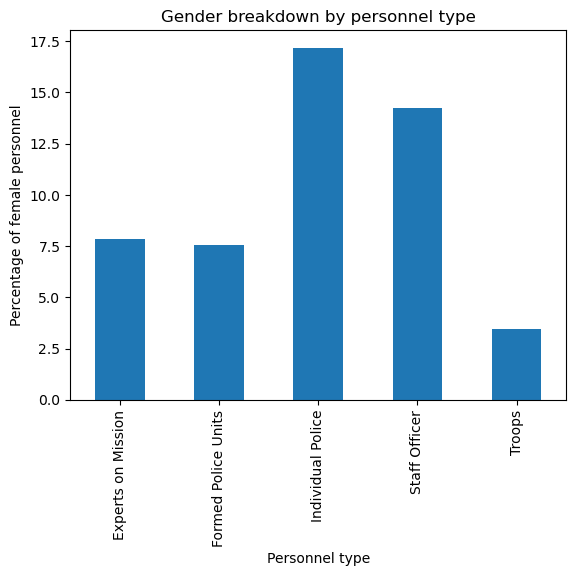

In [26]:
# Group the data by personnel type and sum the number of female and male personnel
df_by_personnel_type = df_gender.groupby(['Personnel_Type']).sum()[['Female_Personnel', 'Male_Personnel']]

# Calculate the total number of personnel for each personnel type
df_by_personnel_type['Total_Personnel'] = df_by_personnel_type['Female_Personnel'] + df_by_personnel_type['Male_Personnel']

# Calculate the percentage of female personnel for each personnel type
df_by_personnel_type['Female_Percentage'] = df_by_personnel_type['Female_Personnel'] / df_by_personnel_type['Total_Personnel'] * 100

# Plot the percentage of female personnel for each personnel type
df_by_personnel_type['Female_Percentage'].plot(kind='bar')
plt.xlabel('Personnel type')
plt.ylabel('Percentage of female personnel')
plt.title('Gender breakdown by personnel type')
plt.show()

In [27]:
# Group the data by contributing country and mission acronym, and calculate the total number of male and female personnel contributed
df_contributions_by_country_and_mission = df_gender.groupby(['Contributing_Country', 'Mission_Acronym'])[['Female_Personnel', 'Male_Personnel']].agg('sum')

# Print the resulting dataframe
print(df_contributions_by_country_and_mission)

                                      Female_Personnel  Male_Personnel
Contributing_Country Mission_Acronym                                  
Afghanistan          MINUSCA                       0.0             0.0
Albania              MINURCAT                      0.0           378.0
                     UNMIL                         2.0            24.0
                     UNMISS                       60.0            42.0
Algeria              MONUSCO                       0.0           412.0
...                                                ...             ...
Zimbabwe             UNMISS                     1668.0          2475.0
                     UNMIT                       174.0           870.0
                     UNOCI                       162.0            40.0
                     UNSMIS                        0.0            12.0
                     UNSOM                        34.0            18.0

[1426 rows x 2 columns]
